# Show tqdm progress bars for all primrary index creation operations

When creating an index, you can optionally set the `show_progress` flag from the `from_documents` index creation call to see tqdm progress bars for the slowest parts of the indexing process (e.g parsing nodes from a document, creating embeddings...etc.)

`KeywordTableIndex.from_documents(documents=documents, show_progress=True)`

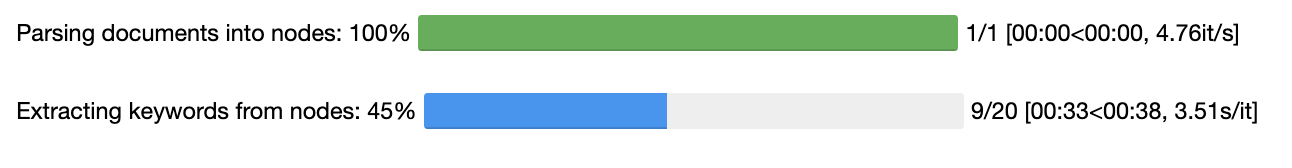

Install and upgrade `ipywidgets` if the tqdm progress bars don't look like the image above.

`pip install ipywidgets --upgrade`

`jupyter nbextension enable --py widgetsnbextension`

run `jupyter notebook` from the root directory to have access to the `paul_graham` data in the `/examples` folder.

In [13]:
from llama_index import (
    VectorStoreIndex,
    SimpleDirectoryReader,
    get_response_synthesizer,
    DocumentSummaryIndex,
    LLMPredictor,
    ServiceContext,
    KeywordTableIndex,
    KnowledgeGraphIndex,
    ListIndex,
    TreeIndex,
)
import os
import openai
from llama_index.llms import OpenAI, MockLLM
from llama_index.storage.storage_context import StorageContext
from llama_index.graph_stores import SimpleGraphStore

In [3]:
# Set environment variable
os.environ["OPENAI_API_KEY"] = "OPENAI_API_KEY_HERE"
openai.api_key = os.getenv("OPENAI_API_KEY")

In [5]:
# Load documents
documents = SimpleDirectoryReader("../../../examples/data/paul_graham").load_data()

### VectorStoreIndex

In [7]:
import nest_asyncio

nest_asyncio.apply()

In [8]:
print("\nVectorStoreIndex with show_progress=True\n")
VectorStoreIndex.from_documents(documents, show_progress=True)

print("\nVectorStoreIndex with show_progress=False\n")
VectorStoreIndex.from_documents(documents, show_progress=False)

print("\nVectorStoreIndex with show_progress=True, use_async=True\n")
VectorStoreIndex.from_documents(documents, show_progress=True, use_async=True)

# print("\nVectorStoreIndex with show_progress=True, use_async=False\n")
# VectorStoreIndex.from_documents(documents, show_progress=False, use_async=False)


VectorStoreIndex with show_progress=True



Generating embeddings: 100%|██████████| 20/20 [00:01<00:00, 12.04it/s]



VectorStoreIndex with show_progress=False


VectorStoreIndex with show_progress=True, use_async=True



Generating embeddings: 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


### DocumentSummaryIndex

In [9]:
llm_chatgpt = OpenAI(temperature=0, model="gpt-3.5-turbo")

service_context = ServiceContext.from_defaults(llm=llm_chatgpt, chunk_size=1024)

print("\nDocumentSummaryIndex with show_progress=True\n")
response_synthesizer = get_response_synthesizer(
    response_mode="tree_summarize", use_async=True, service_context=service_context
)
DocumentSummaryIndex.from_documents(
    documents,
    service_context=service_context,
    response_synthesizer=response_synthesizer,
    show_progress=True,
)

print("\nDocumentSummaryIndex with show_progress=False\n")
DocumentSummaryIndex.from_documents(
    documents,
    service_context=service_context,
    response_synthesizer=response_synthesizer,
    show_progress=False,
)


DocumentSummaryIndex with show_progress=True



Summarizing documents:   0%|          | 0/1 [00:00<?, ?it/s]

current doc id: 0e06a6b5-e808-4508-8051-63458a29c196


Summarizing documents: 100%|██████████| 1/1 [00:15<00:00, 15.24s/it]



DocumentSummaryIndex with show_progress=False

current doc id: 0e06a6b5-e808-4508-8051-63458a29c196


### KeywordTableIndex

In [10]:
print("\nKeywordTableIndex with show_progress=True, use_async=True\n")
KeywordTableIndex.from_documents(
    documents=documents, show_progress=True, use_async=True
)

print("\nKeywordTableIndex with show_progress=True, use_async=False\n")
KeywordTableIndex.from_documents(
    documents=documents, show_progress=True, use_async=False
)

print("\nKeywordTableIndex with show_progress=False, use_async=True\n")
KeywordTableIndex.from_documents(documents=documents, use_async=True)

print("\nKeywordTableIndex with show_progress=False, use_async=False\n")
KeywordTableIndex.from_documents(documents=documents)


KeywordTableIndex with show_progress=True, use_async=True



Extracting keywords from nodes: 100%|██████████| 20/20 [00:54<00:00,  2.71s/it]



KeywordTableIndex with show_progress=True, use_async=False



Extracting keywords from nodes: 100%|██████████| 20/20 [00:46<00:00,  2.31s/it]



KeywordTableIndex with show_progress=False, use_async=True


KeywordTableIndex with show_progress=False, use_async=False



### KnowledgeGraphIndex

In [11]:
print("\nKnowledgeGraphIndex with show_progress=True, use_async=False\n")
llm = OpenAI(temperature=0, model="text-davinci-002")
service_context = ServiceContext.from_defaults(llm=llm, chunk_size=512)
graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)
KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=2,
    storage_context=storage_context,
    service_context=service_context,
    show_progress=True,
    use_async=False,
)

print("\nKnowledgeGraphIndex with show_progress=True, use_async=True\n")
llm = OpenAI(temperature=0, model="text-davinci-002")
service_context = ServiceContext.from_defaults(llm=llm, chunk_size=512)
graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)
KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=2,
    storage_context=storage_context,
    service_context=service_context,
    show_progress=True,
    use_async=True,
)


KnowledgeGraphIndex with show_progress=True, use_async=False



Processing nodes: 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]



KnowledgeGraphIndex with show_progress=True, use_async=True



Processing nodes: 100%|██████████| 40/40 [00:27<00:00,  1.47it/s]


### ListIndex

In [12]:
print("\nListIndex with show_progress=True\n")
ListIndex.from_documents(documents=documents, show_progress=True)

print("\nListIndex with show_progress=False\n")
ListIndex.from_documents(documents=documents)


ListIndex with show_progress=True



Parsing documents into nodes: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]



ListIndex with show_progress=False



### TreeIndex

In [14]:
print("\nTreeIndex with show_progress=True,  use_async=True\n")
llm = MockLLM(max_tokens=256)
service_context = ServiceContext.from_defaults(llm=llm)
TreeIndex.from_documents(
    documents, service_context=service_context, show_progress=True, use_async=True
)

print("\nTreeIndex with show_progress=True, use_async=False\n")
TreeIndex.from_documents(
    documents, service_context=service_context, show_progress=True, use_async=False
)

print("\nTreeIndex with show_progress=False, use_async=True\n")
TreeIndex.from_documents(documents, service_context=service_context, use_async=True)

print("\nTreeIndex with show_progress=False, use_async=False\n")
TreeIndex.from_documents(documents, service_context=service_context)


TreeIndex with show_progress=True,  use_async=True



Generating summaries: 100%|██████████| 2/2 [00:00<00:00, 624.62it/s]



TreeIndex with show_progress=True, use_async=False



Generating summaries: 100%|██████████| 2/2 [00:00<00:00, 651.29it/s]



TreeIndex with show_progress=False, use_async=True


TreeIndex with show_progress=False, use_async=False

